In [ ]:
"""" Theoretical Question

1. What does R-squared represent in a regression model?
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates model fit, ranging from 0 to 1.

2. What are the assumptions of linear regression?

Linearity

Independence of errors

Homoscedasticity (constant variance of errors)

Normality of residuals

No multicollinearity among predictors

3. What is the difference between R-squared and Adjusted R-squared?
Adjusted R-squared adjusts for the number of predictors in the model, penalizing the addition of irrelevant variables, whereas R-squared always increases (or stays the same) when more variables are added.

4. Why do we use Mean Squared Error (MSE)?
MSE measures the average squared difference between observed and predicted values, penalizing larger errors more heavily, and providing a smooth loss surface for optimization.

5. What does an Adjusted R-squared value of 0.85 indicate?
It means that 85% of the variability in the target variable is explained by the predictors, accounting for the number of variables used.

6. How do we check for normality of residuals in linear regression?

Plotting a Q-Q plot (quantile-quantile plot)

Shapiro-Wilk test or Kolmogorov-Smirnov test

Histogram of residuals

7. What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when independent variables are highly correlated, making coefficient estimates unstable and inflating standard errors.

8. What is Mean Absolute Error (MAE)?
MAE is the average of the absolute differences between actual and predicted values, providing a straightforward measure of prediction error.

9. What are the benefits of using an ML pipeline?

Ensures reproducibility

Automates workflows

Reduces data leakage

Organizes preprocessing and modeling steps systematically

10. Why is RMSE considered more interpretable than MSE?
RMSE is in the same units as the target variable (because it’s the square root of MSE), making it more intuitively understandable.

11. What is pickling in Python, and how is it useful in ML?
Pickling serializes Python objects into byte streams, allowing ML models to be saved and loaded later for reuse without retraining.

12. What does a high R-squared value mean?
It indicates that the model explains a large portion of the variance in the dependent variable.

13. What happens if linear regression assumptions are violated?
Model estimates can become biased, inefficient, or invalid, leading to incorrect conclusions.

14. How can we address multicollinearity in regression?

Remove highly correlated predictors

Use Principal Component Analysis (PCA)

Apply regularization (Ridge, Lasso)

15. How can feature selection improve model performance in regression analysis?
It can reduce overfitting, improve model interpretability, and decrease computational cost by keeping only the most relevant predictors.

16. How is Adjusted R-squared calculated?
Adjusted R2=1−(1−R2)× n−1/n−p−1
where n = number of observations, p = number of predictors.

17. Why is MSE sensitive to outliers?
Because it squares the errors, large deviations are disproportionately amplified.

18. What is the role of homoscedasticity in linear regression?
It ensures that the variance of errors is constant across all levels of the independent variables; if not, inference (e.g., hypothesis tests) becomes unreliable.

19. What is Root Mean Squared Error (RMSE)?
RMSE is the square root of the average squared differences between predicted and observed values, providing a measure of model accuracy.

20. Why is pickling considered risky?
Pickled files can execute arbitrary code when loaded, posing security risks if the source is untrusted.

21. What alternatives exist to pickling for saving ML models?

joblib (for large numpy arrays)

Saving model parameters in JSON/YAML

Framework-specific formats (e.g., TensorFlow SavedModel, PyTorch .pt files)

22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity occurs when error variance is not constant. It violates regression assumptions and can lead to inefficient estimates and incorrect inference.

23. How can interaction terms enhance a regression model's predictive power?
They capture the combined effect of two variables on the target variable, modeling more complex relationships than individual effects.
"""""

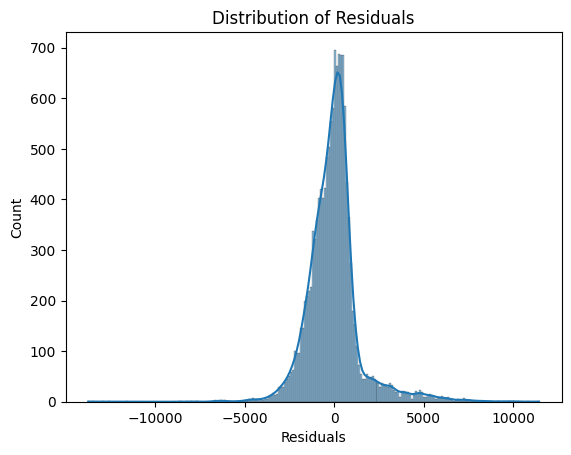

In [1]:
#Practical Question

#1. Visualize Residuals for Linear Regression on Seaborn's "diamonds" dataset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


In [2]:
#2. Calculate and Print MSE, MAE, and RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 2310119.635474932
MAE: 991.8625215831571
RMSE: 1519.9077720292544


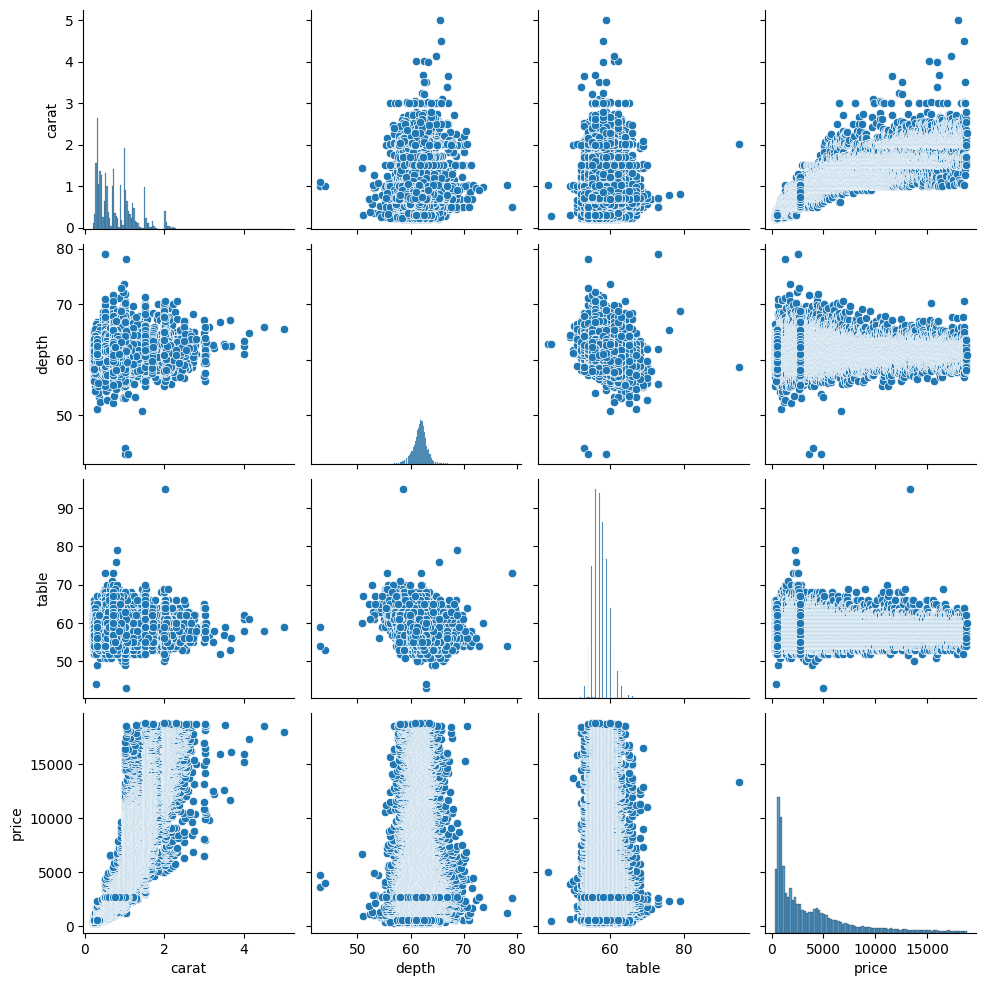

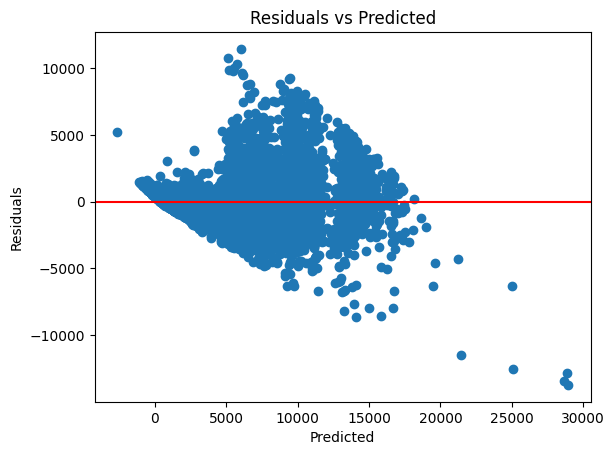

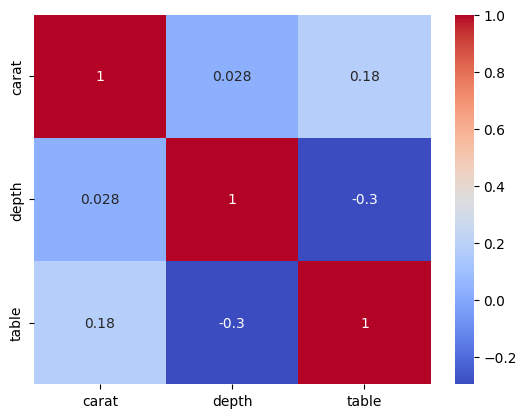

In [3]:
#3. Check Linear Regression Assumptions

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Linearity
sns.pairplot(diamonds[['carat', 'depth', 'table', 'price']])
plt.show()

# Homoscedasticity
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity
corr_matrix = diamonds[['carat', 'depth', 'table']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [4]:
#4. ML Pipeline with Feature Scaling and Model Comparison

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R^2: {scores.mean():.3f}")



LinearRegression: Mean R^2: -1.525
Ridge: Mean R^2: -1.525
RandomForest: Mean R^2: -0.834


In [5]:
#5. Simple Linear Regression and Print Coefficients

model = LinearRegression()
model.fit(X_train[['carat']], y_train)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_test[['carat']], y_test))


Coefficient: [7767.15619101]
Intercept: -2261.583062985816
R-squared: 0.8485280982587889


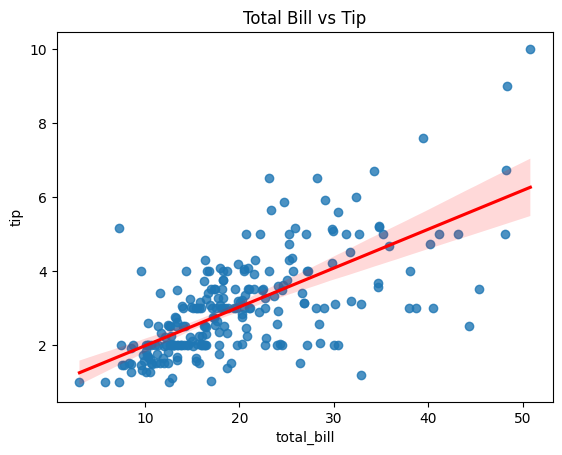

In [6]:
#6. Analyze 'tips' Dataset: total_bill vs tip

tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

# Plot
sns.regplot(x='total_bill', y='tip', data=tips, line_kws={"color":"red"})
plt.title("Total Bill vs Tip")
plt.show()


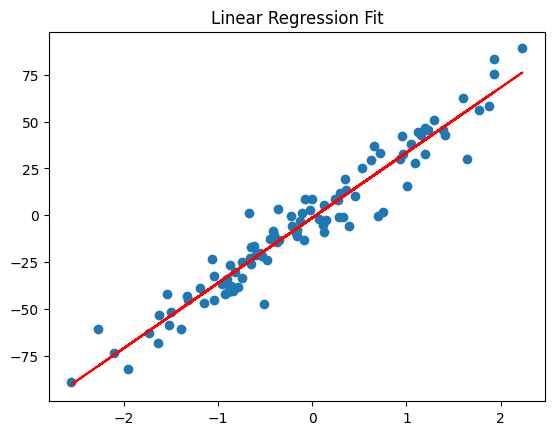

In [7]:
#7. Fit Linear Regression on Synthetic Data and Plot

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)

# Plot
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Linear Regression Fit")
plt.show()


In [8]:
#8. Pickle a Trained Model

import pickle

with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)


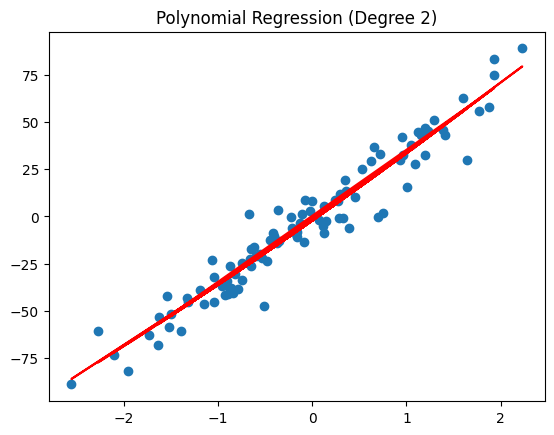

In [9]:
#9. Fit Polynomial Regression (Degree 2) and Plot

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()



In [10]:
#10. Generate Synthetic Data and Fit Linear Regression

import numpy as np

X = np.random.rand(100, 1)
y = 3*X.flatten() + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [2.70644626]
Intercept: 0.025411281717781176


In [11]:
#11. Compare Polynomial Models of Different Degrees

degrees = [1, 2, 3, 4]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    print(f"Degree {d}: R-squared {model.score(X_poly, y):.3f}")


Degree 1: R-squared 0.331
Degree 2: R-squared 0.344
Degree 3: R-squared 0.349
Degree 4: R-squared 0.349


In [12]:
#12. Simple Linear Regression with Two Features
X = diamonds[['carat', 'table']]
y = diamonds['price']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))


Coefficients: [7820.03788357  -74.30074671]
Intercept: 1961.9923330091192
R-squared: 0.8510052873951578


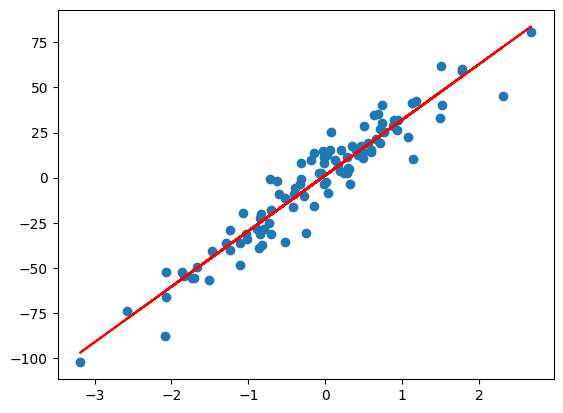

In [13]:
#13. Fit Linear Model and Visualize Regression Line

X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()


In [14]:
#14. Check Multicollinearity Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  feature       VIF
0       A  3.001143
1       B  3.436634
2       C  3.666985


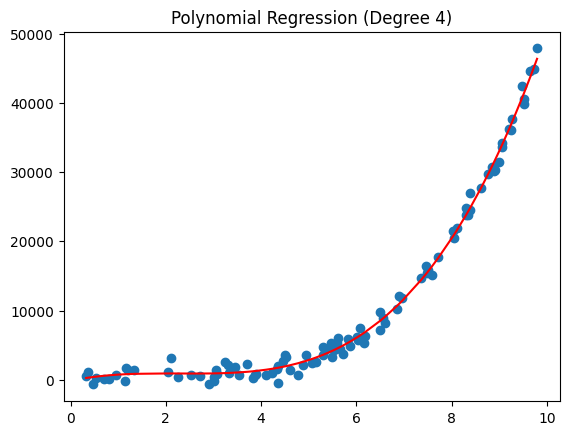

In [15]:
#15. Polynomial Regression (Degree 4) and Plot

X = np.random.rand(100, 1) * 10
y = 5*X.flatten()**4 + np.random.randn(100) * 1000

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [16]:
#16. Pipeline with Standardization and Multiple Linear Regression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
print("R-squared:", pipeline.score(X_test, y_test))


R-squared: 0.852949398522144


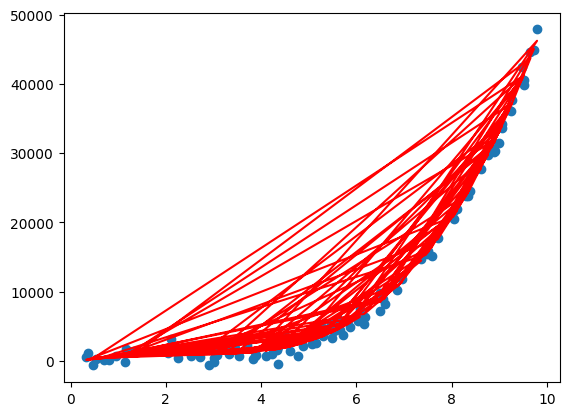

In [17]:
#17. Polynomial Regression (Degree 3) and Plot

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.show()


In [18]:
#18. Multiple Linear Regression with 5 Features

X, y = make_regression(n_samples=100, n_features=5, noise=10)
model = LinearRegression()
model.fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 0.9962439244877553
Coefficients: [79.61276696 75.19760742 91.10066847 57.77993536 71.46644703]


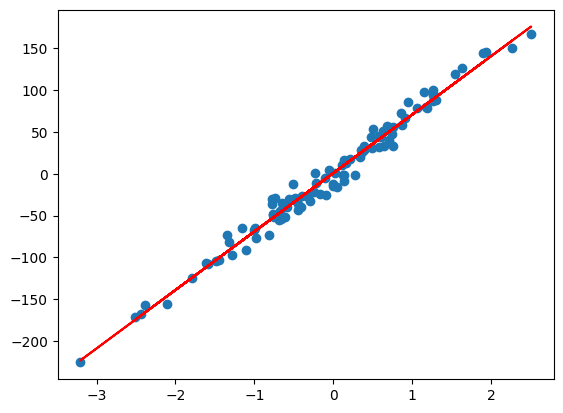

In [19]:
#19. Generate Data, Fit Model, and Plot

X, y = make_regression(n_samples=100, n_features=1, noise=10)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()


In [20]:
#20. Multiple Linear Regression with 3 Features

X, y = make_regression(n_samples=100, n_features=3, noise=10)

model = LinearRegression()
model.fit(X, y)

print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared: 0.9900681314428619
Coefficients: [77.54088845 36.01322775 42.72782533]


In [21]:
#21. Serialize and Deserialize Model using Joblib

import joblib

joblib.dump(model, 'model.joblib')
loaded_model = joblib.load('model.joblib')

print("Loaded model R-squared:", loaded_model.score(X, y))


Loaded model R-squared: 0.9900681314428619


In [22]:
#22. Linear Regression with Categorical Features (tips dataset)

tips = sns.load_dataset('tips')
tips_encoded = pd.get_dummies(tips, drop_first=True)

X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

model = LinearRegression()
model.fit(X, y)

print("R-squared:", model.score(X, y))


R-squared: 0.47007812322060794


In [23]:
#23. Compare Ridge Regression vs Linear Regression

from sklearn.linear_model import Ridge

X, y = make_regression(n_samples=100, n_features=5, noise=10)

linear = LinearRegression()
ridge = Ridge(alpha=1.0)

linear.fit(X, y)
ridge.fit(X, y)

print("Linear Coefs:", linear.coef_)
print("Ridge Coefs:", ridge.coef_)

print("Linear R-squared:", linear.score(X, y))
print("Ridge R-squared:", ridge.score(X, y))


Linear Coefs: [35.33505182 79.48373347 79.35023328 64.61089945 18.98499994]
Ridge Coefs: [34.95374699 78.58988983 78.74462944 63.93017388 19.03609182]
Linear R-squared: 0.9946201503687709
Ridge R-squared: 0.9945341740505746


In [24]:
#24. Cross-validation on Linear Regression

from sklearn.model_selection import cross_val_score

X, y = make_regression(n_samples=100, n_features=2, noise=10)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R-squared scores:", scores)
print("Mean R-squared:", scores.mean())


Cross-validated R-squared scores: [0.98983887 0.98607465 0.99327828 0.99335134 0.9883408 ]
Mean R-squared: 0.9901767880810564


In [25]:
#25. Compare Polynomial Models of Different Degrees

X, y = make_regression(n_samples=100, n_features=1, noise=15)

for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    print(f"Degree {degree}: R-squared {model.score(X_poly, y):.3f}")


Degree 1: R-squared 0.543
Degree 2: R-squared 0.555
Degree 3: R-squared 0.556
Degree 4: R-squared 0.560
